# Statistics for Path Lengths (Number of Segments)

We want to know how many segments typical paths have.

Note that this varies strongly with network complexity, but we should get a feel for it from this.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
import seaborn as sns

In [3]:
basedir = '../data/jhw_2024-05-13'
# fname = "%s/mtn_stavanger_HDBSCAN_25_eval_results_by_shipgroup.csv" % basedir
fname = "%s/tromso_dijkstra_all_types.csv" % basedir

In [4]:
df = pd.read_csv(fname)
# df.head(3).T

In [5]:
df.shape

(1521, 13)

In [6]:
df = df.dropna(how='any')

In [7]:
df.shape

(1032, 13)

In [8]:
paths_all = []
for krow, row in enumerate(df.itertuples()):
    # https://stackoverflow.com/a/23112008/21124232
    # paths_all.append(ast.literal_eval(row.path))  # this one when loading mtn_stavanger_HDBSCAN_25_eval_results_by_shipgroup.csv
    paths_all.append(ast.literal_eval(row.true_path))  # this one when loading tromso_dijkstra_all_types.csv
path_lengths = [ len(path) for path in paths_all ]
path_lengths = np.array(path_lengths)
print(path_lengths)

[60 53 40 ... 16  3 62]


<Axes: ylabel='Count'>

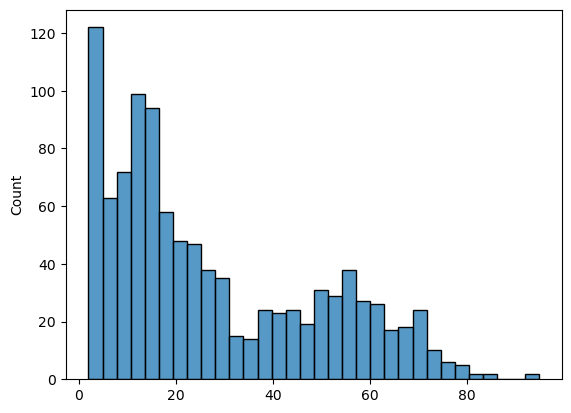

In [9]:
sns.histplot(path_lengths, bins=32)

Text(0, 0.5, 'Percentile')

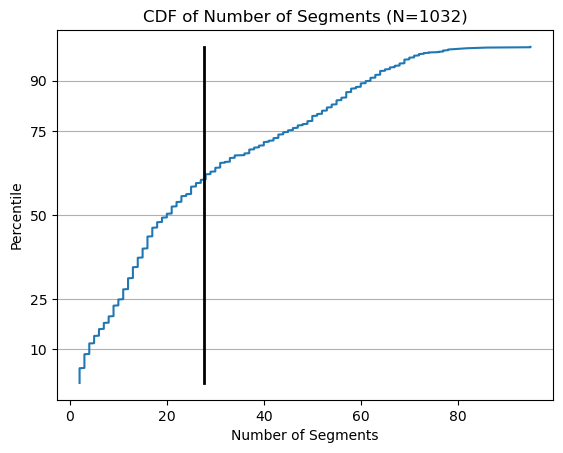

In [10]:
# CDF with percentiles
fig, ax = plt.subplots(1,1)
# fig.set_size_inches(8,3)

ax.plot(sorted(path_lengths),np.linspace(0,1,len(path_lengths))*100)
ax.plot([np.mean(path_lengths)]*2, [0,100], 'k', lw=2)
ax.set_title("CDF of Number of Segments (N=%i)" % len(path_lengths))
ax.set_xlabel('Number of Segments')
# ax.set_xscale('log')

ax.set_yticks([10,25,50,75,90])
ax.grid(axis='y')
ax.set_ylabel('Percentile')

# fig.subplots_adjust(wspace=0.3)